In [1]:
import json
import sys
from train_cnfqi import run
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt 
import numpy as np
import torch

# Interpretability

In [ ]:
import shap
printed_bg, printed_fg, performance, nfq_agent, X, X_test = run(verbose=False, is_contrastive=True, evaluations=2, force_left=5)

In [ ]:
group_0 = []
group_1 = []
for x, g in zip(X_test[0], X_test[1]):
    if g == 0:
        group_0.append(x.cpu().detach().numpy())
    else:
        group_1.append(x.cpu().detach().numpy())

In [ ]:
group_0 = torch.Tensor(np.asarray(group_0))
group_1 = torch.Tensor(np.asarray(group_1))

In [ ]:
e = shap.DeepExplainer(nfq_agent._nfq_net, X[0])
shap_values = e.shap_values(group_0[:10])
shap_values

In [ ]:
explanation = shap.Explanation(shap_values)
explanation.data = ["Cart Position", "Cart Velocity", "Pole Angle", "Pole Velocity at Tip", "Action"]

In [ ]:
shap.plots.bar(shap.Explanation(shap_values), show=False)
plt.title("Background SHAP Values")
#plt.yticks(["Feature 0", "Feature 1", "Feature 2", "Feature 3", "Feature 4"], ["Cart Position", "Cart Velocity", "Pole Angle", "Pole Velocity at Tip", "Action"])

# Force left=0

In [2]:
import json
from train_cnfqi import run, warm_start
num_iter=15
results = {'fqi': {}, 'cfqi': {}, 'warm_start': {}}
for i in range(num_iter):
    print(str(i))
    performance = run(verbose=False, is_contrastive=True, evaluations=2, force_left=0)
    results['cfqi'][i] = performance
    performance = run(verbose=False, is_contrastive=False, evaluations=2, force_left=0)
    results['fqi'][i] = performance
    performance = warm_start(verbose=False, is_contrastive=False, evaluations=2, force_left=0)
    results['warm_start'][i] = performance
    
    
#     with open('force_left=0.json', 'w') as f:
#         json.dump(results, f)  

0


/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Fg trained after 114 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 196 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
1
Fg trained after 119 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
2
Fg trained after 0 epochs
BG stayed up for steps:  [141, 104]
FG stayed up for steps:  [114, 115]
Fg trained after 148 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
3
Fg trained after 100 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [90, 77]
FG stayed up for steps:  [90, 77]
4
Fg trained after 109 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [90, 79]
FG stayed up f

In [3]:
fqi_results = []
cfqi_results = []
ws_results = []
for alg in ['cfqi', 'fqi', 'warm_start']:
    for key in results[alg]:
        if alg == 'fqi':
            fqi_results.extend(results[alg][key])
        elif alg == 'cfqi':
            cfqi_results.extend(results[alg][key])
        else:
            ws_results.extend(results[alg][key ])

/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0.5, 1.0, 'Force left = 0')

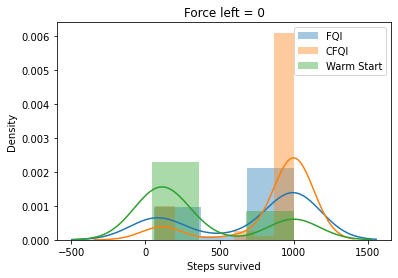

In [4]:
sns.distplot(fqi_results, label='FQI')
sns.distplot(cfqi_results, label='CFQI')
sns.distplot(ws_results, label='Warm Start')
plt.legend()
plt.xlabel("Steps survived")
plt.title("Force left = 0")

# Force Left vs Performance

In [8]:
import json
from train_cnfqi import run
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

num_iter=2
results = {}
for i in range(11):
    results[i] = {}
    results[i]['cfqi'] = {}
    results[i]['fqi'] = {}
    results[i]['warm_start'] = {}

for i in range(num_iter):
    for f in range(11):
        print(str(i) + str(f))
        performance = run(verbose=False, is_contrastive=True, evaluations=2, force_left=f)
        results[f]['cfqi'][i] = performance
        performance = run(verbose=False, is_contrastive=False, evaluations=2, force_left=f)
        results[f]['fqi'][i] = performance
        performance = warm_start(verbose=False, is_contrastive=False, evaluations=2, force_left=0)
        results[f]['warm_start'][i] = performance
        
    
    with open('force_left_v_performance.json', 'w') as f:
        json.dump(results, f)  

00
Fg trained after 274 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 119 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
01
Fg trained after 259 epochs
BG stayed up for steps:  [1000, 88]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
02
Fg trained after 405 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
03
Fg trained after 180 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
04
Fg trained after 224 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [1000, 1000]
Fg trained after 0 epochs
BG stayed up for steps:  [1000, 1000]
FG stayed up for steps:  [114, 1000]
05
Fg trained after 102 epochs
BG stayed up for steps:  [1

/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

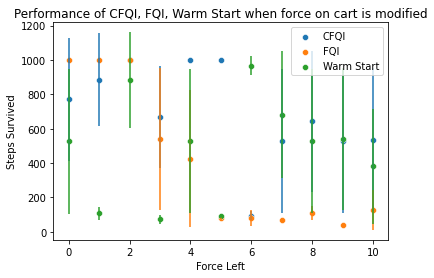

In [10]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

c_success = []
f_success = []
w_success = []
c_errs = []
f_errs = []
w_errs = []
for i in range(11):
    cfqi_perf = []
    fqi_perf = []
    ws_perf = []
    for key in results[i]['fqi']:
        fqi_perf.extend(results[i]['fqi'][key])
    for key in results[i]['cfqi']:
        cfqi_perf.extend(results[i]['cfqi'][key])
    for key in results[i]['warm_start']:
        ws_perf.extend(results[i]['warm_start'][key])
    
    c_success.append(np.mean(cfqi_perf))
    f_success.append(np.mean(fqi_perf))
    w_success.append(np.mean(ws_perf))
    m, h = mean_confidence_interval(cfqi_perf)
    c_errs.append(h)
    m, h = mean_confidence_interval(fqi_perf)
    f_errs.append(h)
    m, h = mean_confidence_interval(ws_perf)
    w_errs.append(h) 
    
x = [k for k in range(11)]
sns.scatterplot(x, c_success, label='CFQI')
plt.errorbar(x, c_success ,yerr=c_errs, linestyle="None")
sns.scatterplot(x, f_success, label='FQI')
plt.errorbar(x, f_success ,yerr=f_errs, linestyle="None")
sns.scatterplot(x, w_success, label='Warm Start')
plt.errorbar(x, w_success ,yerr=w_errs, linestyle="None")
plt.title("Performance of CFQI, FQI, Warm Start when force on cart is modified")
plt.xlabel("Force Left")
plt.ylabel("Steps Survived")
plt.show()